In [ ]:
'''Extrae el archivo zip del dataset'''
import zipfile
with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
'''Cargar librerias'''
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img


%matplotlib inline

In [ ]:
'''Instalar modulo'''
!pip install split-folders
import splitfolders
'''Para asignar el entrenamiento, prueba y validacion'''
splitfolders.ratio('./dataset', output="output", seed=1337, ratio=(.6, 0.2,0.2)) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 400 files [00:00, 7373.17 files/s]


In [ ]:
'''Para procesar los datos con keras'''
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(128, 128),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(128, 128),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(128, 128),
batch_size=64
)

Found 240 files belonging to 5 classes.
Found 80 files belonging to 5 classes.
Found 80 files belonging to 5 classes.


In [ ]:
'''Clases de arroz'''
class_names = train_ds.class_names
print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


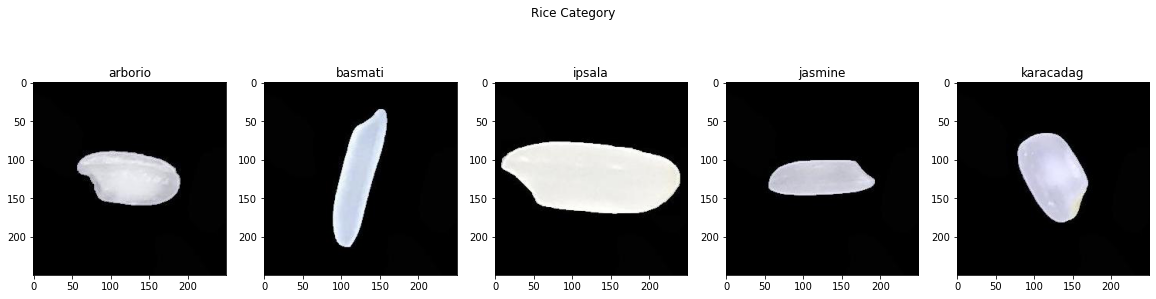

In [ ]:
'''Para crear la figura'''
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
'''Para tomar los tipos de datos para predecir'''
arborio_img = img.imread('./dataset/Arborio/Arborio (1).jpg')
basmati_img = img.imread('./dataset//Basmati/Basmati (1).jpg')
ipsala_img = img.imread('./dataset/Ipsala/Ipsala (1).jpg')
jasmine_img = img.imread('./dataset/Jasmine/Jasmine (1).jpg')
karacadag_img = img.imread('./dataset/Karacadag/Karacadag (1).jpg')

'''Poner nombres a las imagenes'''
ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')
'''Ejecutar las imagenes de los tipos de arroz'''
ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

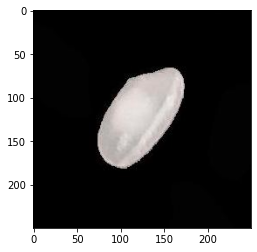

In [ ]:
'''Toma una imagen como prediccion'''
data='./dataset'
import cv2
for category in class_names:
    path=os.path.join(data, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
'''Creacion del entrenamiento de los datos'''
training_data=[]
IMG_SIZE=100
def create_training_data():
    for category in class_names:
        path=os.path.join(data, category)
        class_num=class_names.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data() 
'''Ver la cantidad de datos'''
print(len(training_data))

400


In [ ]:
'''Para asignar los datos de entrenamiento'''
lenofimage = len(training_data)
'''Creacion de la variable x and y'''
X=[]
y=[]

'''Mostrar las categorias'''
for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
'''Cantidad de datos'''
X.shape
'''Dividir x en numero maximo de pixel'''
X = X/255.0
'''La variable x en position 1'''
X[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
'''Cantidad de datos en y'''
y=np.array(y)
y.shape

(400,)

# SVM Lineal

In [ ]:
'''Para entrenar el modelo'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
from sklearn.svm import SVC
'''Asignacion del kernel'''
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
'''Creacion de la predicion'''
y2 = svc.predict(X_test)
'''Acurracy del modelo'''
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))
'''Acurracy de cada imagen'''
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is 0.94
Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       1.00      0.96      0.98        25
           2       1.00      0.95      0.98        21
           3       0.89      1.00      0.94        16
           4       0.88      0.94      0.91        16

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



In [ ]:
'''Para visualizar los datos'''
import pandas as pd
'''Mostrar el resultado de la prediccion'''
result = pd.DataFrame({'original' : y_test,'predicted' : y2})
result.head(20)

,original,predicted
0,1,1
1,4,0
2,0,0
3,0,0
4,0,0
5,2,2
6,0,0
7,3,3
8,2,2
9,2,2


# Kernel Lineal

In [ ]:
'''Creacion kernel Lineal'''
linear_param_grid = {
    
        "kernel": ["linear"],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
        "decision_function_shape": ['ovo', 'ovr']
}
'''Librerias para usar SVM en el modelo'''
from sklearn import svm
from sklearn.model_selection import GridSearchCV
linear_grid = GridSearchCV(svm.SVC(), linear_param_grid)
linear_grid.fit(X_train,y_train)
print(linear_grid.best_estimator_)

'''Libreria para las metricas'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
linear_pred = linear_grid.predict(X_test)
'''Creacion de metricas'''
linear_accuracy = accuracy_score(y_test, linear_pred)
linear_precision = precision_score(y_test, linear_pred, average='weighted')
linear_recall = recall_score(y_test, linear_pred, average='weighted')
linear_f1 = f1_score(y_test, linear_pred, average='weighted')
print('Accuracy (Linear Kernel): ', "%.2f" % (linear_accuracy*100))
print('F1 (Linear Kernel): ', "%.2f" % (linear_f1*100))
print('Precision (Linear Kernel): ', "%.2f" % (linear_precision*100))
print('Recall (Linear Kernel): ', "%.2f" % (linear_recall*100))

SVC(C=0.1, decision_function_shape='ovo', kernel='linear')
Accuracy (Linear Kernel):  94.00
F1 (Linear Kernel):  94.02
Precision (Linear Kernel):  94.24
Recall (Linear Kernel):  94.00


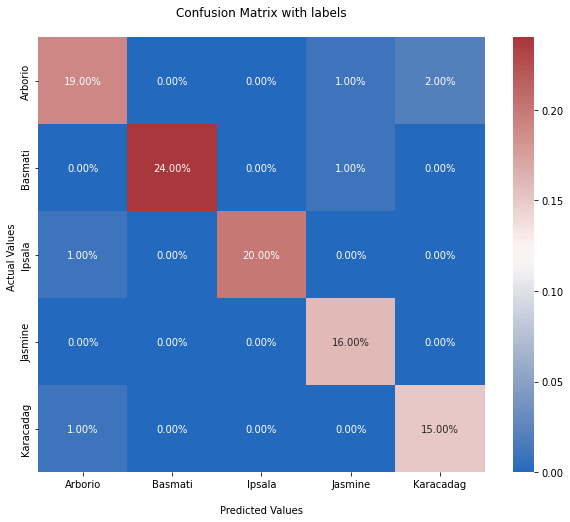

In [ ]:
'''Creacion de las imagenes'''
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y2)

plt.figure(figsize=(10,8))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='vlag')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
'''Graficar la matriz'''
plt.show()

# Kernel Polinomial

In [ ]:
poly_param_grid = {
    
        "kernel": ["poly"],
        "degree": [2, 3, 4],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
        "decision_function_shape": ['ovo', 'ovr']
}

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
poly_grid = GridSearchCV(svm.SVC(), poly_param_grid)
poly_grid.fit(X_train,y_train)
print(poly_grid.best_estimator_)

SVC(C=10, decision_function_shape='ovo', degree=2, kernel='poly')


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
poly_pred = poly_grid.predict(X_test)
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_precision = precision_score(y_test, poly_pred, average='weighted')
poly_recall = recall_score(y_test, poly_pred, average='weighted')
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))
print('Precision (Polynomial Kernel): ', "%.2f" % (poly_precision*100))
print('Recall (Polynomial Kernel): ', "%.2f" % (poly_recall*100))

Accuracy (Polynomial Kernel):  95.00
F1 (Polynomial Kernel):  95.00
Precision (Polynomial Kernel):  95.34
Recall (Polynomial Kernel):  95.00


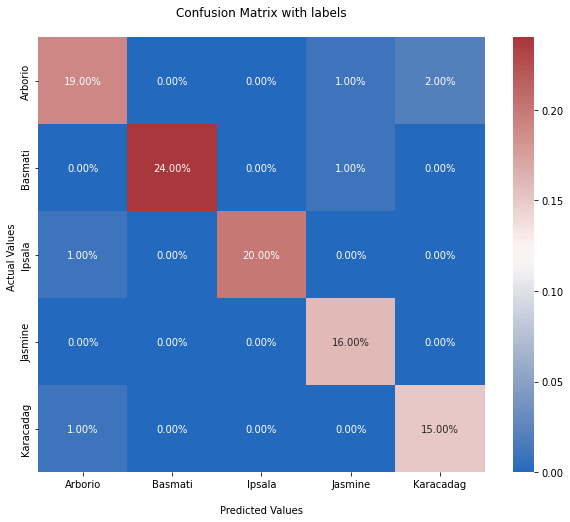

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y2)

plt.figure(figsize=(10,8))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='vlag')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.show()

# Kernel RBF

In [ ]:
'''Creacion del kernel RBF'''
rbf_param_grid = {
        "kernel": ["rbf"],
        "gamma": ["auto", "scale"],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
        "decision_function_shape": ['ovo', 'ovr']
}

In [ ]:
'''Llamada al kernel de RBF kernel'''
from sklearn import svm
from sklearn.model_selection import GridSearchCV
rbf_grid = GridSearchCV(svm.SVC(probability=True), rbf_param_grid)
rbf_grid.fit(X_train,y_train)
print(rbf_grid.best_estimator_)

SVC(C=10, decision_function_shape='ovo', probability=True)


In [ ]:
'''Las metricas del modelo'''
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
rbf_pred = rbf_grid.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_precision = precision_score(y_test, rbf_pred, average='weighted')
rbf_recall = recall_score(y_test, rbf_pred, average='weighted')
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))
print('Precision (RBF Kernel): ', "%.2f" % (rbf_precision*100))
print('Recall (RBF Kernel): ', "%.2f" % (rbf_recall*100))

Accuracy (RBF Kernel):  97.00
F1 (RBF Kernel):  97.01
Precision (RBF Kernel):  97.17
Recall (RBF Kernel):  97.00


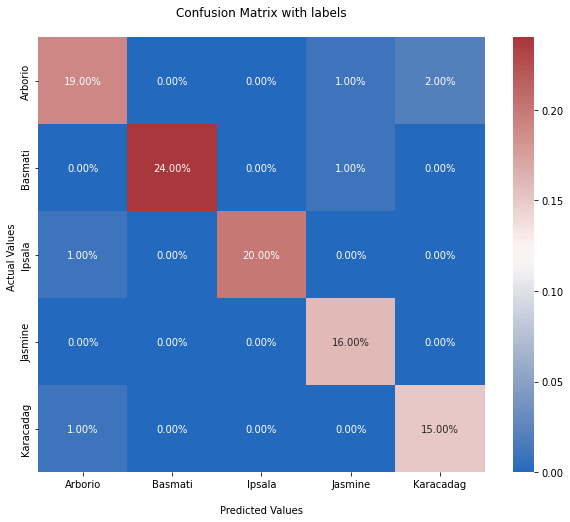

In [ ]:
'''Creacion de la matriz de confusion'''
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y2)

plt.figure(figsize=(10,8))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='vlag')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.show()